In [1]:
%pip install -e ..
%load_ext autoreload
%autoreload 2

Obtaining file:///C:/Users/USER/Desktop/projects/Credit%20Score%20Modelling
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for credit-score-modelling (pyproject.toml): started
  Building editable for credit-score-modelling (pyproject.toml): finished with status 'done'
  Created wheel for credit-score-modelling: filename=credit_score_modelling-0.1.0-0.editable-py3-none-any.whl size=2389 sha256=e2be1eff6612328efd5d6b465f83fa37fbdd2decf1f14f168dcceac51f449726
  Stored in directory: C:\Users\USER\AppData\Local\Temp\pip-ephem-whee


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from credit_score.features.load_data import load_split
from credit_score.features.cleaning import fit_cleaning_metadata, clean_and_prepare

In [3]:
# Load raw split datasets
df_train = load_split("train")
df_val   = load_split("val")
df_test  = load_split("test")

# Fit cleaning metadata on train
metadata = fit_cleaning_metadata(df_train)

In [4]:
# Clean all datasets using train-based logic
df_train = clean_and_prepare(df_train, metadata)
df_val   = clean_and_prepare(df_val, metadata)
df_test  = clean_and_prepare(df_test, metadata)

Outliers removed: 11
Outliers removed: 3
Outliers removed: 1


In [5]:
df_train.shape, df_val.shape, df_test.shape

((34989, 33), (9997, 33), (4999, 33))

<h3 align='center' style="color:pink"> Feature Engineering </h3>

In [10]:
df_train["loan_to_income"] = round(df_train["loan_amount"] / df_train["income"],2)
df_train["loan_to_income"].describe()

count    34989.000000
mean         1.557255
std          0.974709
min          0.300000
25%          0.770000
50%          1.160000
75%          2.460000
max          4.570000
Name: loan_to_income, dtype: float64

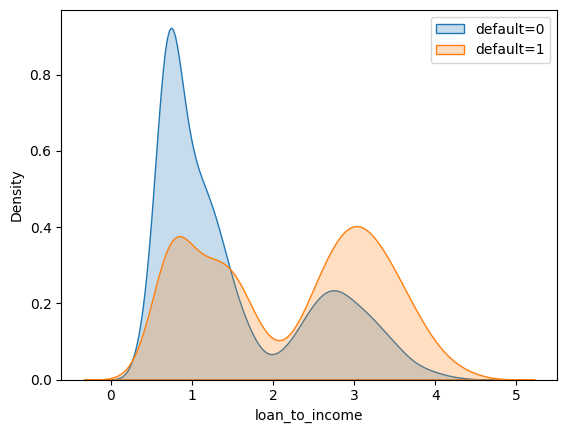

In [17]:
sns.kdeplot(df_train[df_train["default"] == 0]["loan_to_income"], fill=True, label='default=0')
sns.kdeplot(df_train[df_train["default"] == 1]["loan_to_income"], fill=True, label='default=1')
plt.legend()
plt.show()

In [16]:
df_train["deliquency_ratio"] = round(df_train["delinquent_months"]*100 / df_train["total_loan_months"],1)
df_train[["delinquent_months", "total_loan_months", "deliquency_ratio", ]].sample(5)

,delinquent_months,total_loan_months,deliquency_ratio
8489,0,54,0.0
21186,11,17,64.7
34535,2,78,2.6
33266,0,125,0.0
16059,0,45,0.0


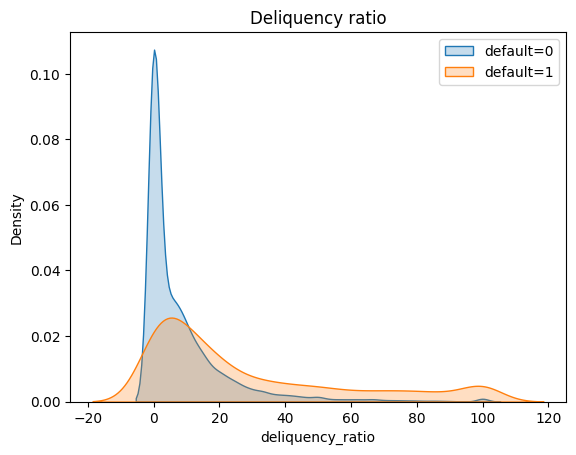

In [18]:
sns.kdeplot(df_train[df_train["default"] == 0]["deliquency_ratio"], fill=True, label='default=0')
sns.kdeplot(df_train[df_train["default"] == 1]["deliquency_ratio"], fill=True, label='default=1')
plt.title(f"Deliquency ratio")
plt.legend()
plt.show()

In [ ]:
df_train["avg_dpd_per_deliquency"] = np.where(df_train["delinquent_months"] != 0,
                                              df_train["total_dpd"] / df_train["delinquent_months"], 0)
df_train["avg_dpd_per_deliquency"].describe()

count    34989.000000
mean         3.275402
std          2.908028
min          0.000000
25%          0.000000
50%          4.333333
75%          5.733333
max         10.000000
Name: avg_dpd_per_deliquency, dtype: float64

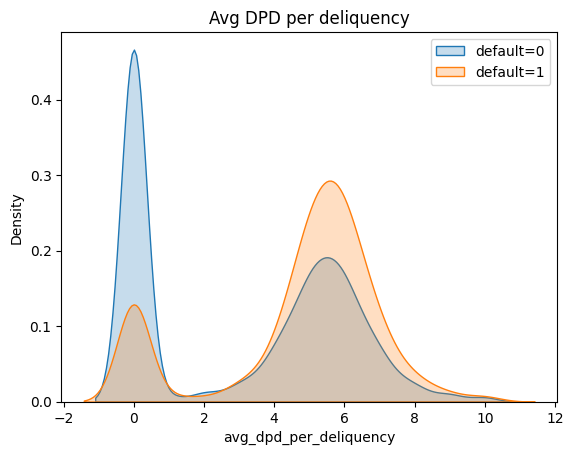

In [22]:
sns.kdeplot(df_train[df_train["default"] == 0]["avg_dpd_per_deliquency"], fill=True, label='default=0')
sns.kdeplot(df_train[df_train["default"] == 1]["avg_dpd_per_deliquency"], fill=True, label='default=1')
plt.title(f"Avg DPD per deliquency")
plt.legend()
plt.show()